# **Clustering Regional Performance Metrics: Insights for Targeted Educational Strategies**

This notebook focuses on clustering analysis to group regions based on their socio-economic and educational performance metrics. The goal of this analysis is to identify patterns and similarities among regions, providing insights for targeted interventions and policy recommendations.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load data
df = pd.read_csv("processed_dataset.csv")
df.info()
df.head()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CNTSCHID  6867 non-null   int64  
 1   CNTSTUID  6867 non-null   int64  
 2   STRATUM   6867 non-null   object 
 3   REPEAT    6867 non-null   int64  
 4   WORKPAY   6867 non-null   int64  
 5   DURECEC   6867 non-null   int64  
 6   SISCO     6867 non-null   int64  
 7   SCHRISK   6867 non-null   float64
 8   INFOSEEK  6867 non-null   float64
 9   ESCS      6867 non-null   float64
 10  ICTSCH    6867 non-null   float64
 11  ICTAVSCH  6867 non-null   int64  
 12  ICTQUAL   6867 non-null   float64
 13  ICTENQ    6867 non-null   float64
 14  MPVMATH   6867 non-null   float64
 15  MPVREAD   6867 non-null   float64
 16  MPVSCIE   6867 non-null   float64
dtypes: float64(9), int64(7), object(1)
memory usage: 912.1+ KB


<bound method NDFrame.describe of       CNTSCHID  CNTSTUID STRATUM  REPEAT  WORKPAY  DURECEC  SISCO  SCHRISK  \
0     50400025  50400011   MAR01       0        0        5      1   0.5348   
1     50400152  50400019   MAR01       0        0        2      1  -0.6386   
2     50400093  50400034   MAR01       0        0        2      1   0.5348   
3     50400137  50400052   MAR01       1        0        0      9  -0.6386   
4     50400021  50400065   MAR01       1        2        2      1   0.5348   
...        ...       ...     ...     ...      ...      ...    ...      ...   
6862  50400166  50406734   MAR12       0        0        2      1   1.1800   
6863  50400041  50406755   MAR12       1        0        2      1  -0.6386   
6864  50400041  50406876   MAR12       1        0        2      9  -0.6386   
6865  50400041  50406914   MAR12       1        5        4      1   1.2046   
6866  50400041  50407006   MAR12       1        0        2      1  -0.6386   

      INFOSEEK    ESCS  ICTSCH  ICTAVSCH  ICTQUAL  ICTENQ   MPVMATH   MPVREAD  \
0       0.2264  1.0273  0.4062         7  -0.2205  3.7481  360.7487  355.3656   
1       0.8970 -2.4400  0.4062         7  -0.6091  0.3041  461.7184  487.5750   
2       0.4893  0.6817  0.4062         7  -0.7818  0.4455  414.4962  460.3951   
3      -1.1032 -3.1341  0.4062         7   0.4758 -1.1168  340.1526  284.2741   
4       0.8060 -1.1593  0.4062         7  -2.8028 -2.3763  396.9762  347.6067   
...        ...     ...     ...       ...      ...     ...       ...       ...   
6862    0.0059 -3.3160  0.4062         7  -0.3210 -0.9887  366.7102  381.4757   
6863    0.3917 -3.3284  0.4062         7  -2.8028 -0.4493  353.4638  337.6010   
6864   -1.1032 -1.6261  0.4062         7  -2.8028 -1.0104  373.6136  372.7516   
6865    1.0665 -1.4488  0.4062         7  -0.9309  0.4161  282.8220  269.5281   
6866    0.1067 -2.6772  0.4062         7  -0.1309 -0.3068  385.2879  400.2840   

       MPVSCIE  
0     338.8896  
1     488.9350  
2     423.1751  
3     347.6440  
4     398.9943  
...        ...  
6862  377.2469  
6863  363.6942  
6864  388.2775  
6865  310.5602  
6866  388.9387  

[6867 rows x 17 columns]>

In [ ]:
# Dictionary of columns and their respective encoded missing values
missing_value_map = {
    'WORKPAY': [95, 97, 98, 99],
    'DURECEC': [95, 97, 98, 99],
    'SCHRISK': [95.0000, 97.0000, 98.0000, 99.0000],
    'INFOSEEK': [95.0000, 97.0000, 98.0000, 99.0000],
    'ESCS': [95.0000, 97.0000, 98.0000, 99.0000],
    'ICTSCH': [95.0000, 97.0000, 98.0000, 99.0000],
    'ICTAVSCH': [95, 97, 98, 99],
    'ICTQUAL': [95.0000, 97.0000, 98.0000, 99.0000],
    'ICTENQ': [95.0000, 97.0000, 98.0000, 99.0000],
    'MPVMATH': [95.0000, 97.0000, 98.0000, 99.0000],
    'MPVREAD': [95.0000, 97.0000, 98.0000, 99.0000],
    'MPVSCIE': [95.0000, 97.0000, 98.0000, 99.0000]
}

for column, missing_values in missing_value_map.items():
    df[column] = df[column].replace(missing_values, np.nan)


print("Missing values count per column after replacement:")
print(df.isnull().sum())

Missing values count per column after replacement:
CNTSCHID    0
CNTSTUID    0
STRATUM     0
REPEAT      0
WORKPAY     0
DURECEC     0
SISCO       0
SCHRISK     0
INFOSEEK    0
ESCS        0
ICTSCH      0
ICTAVSCH    0
ICTQUAL     0
ICTENQ      0
MPVMATH     0
MPVREAD     0
MPVSCIE     0
dtype: int64


REPEAT
0    3640
1    3156
9      71
dtype: int64
SISCO
0     197
1    3251
9    3419
dtype: int64


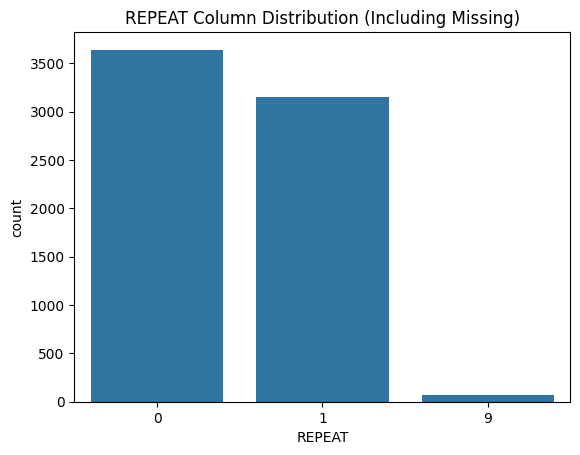

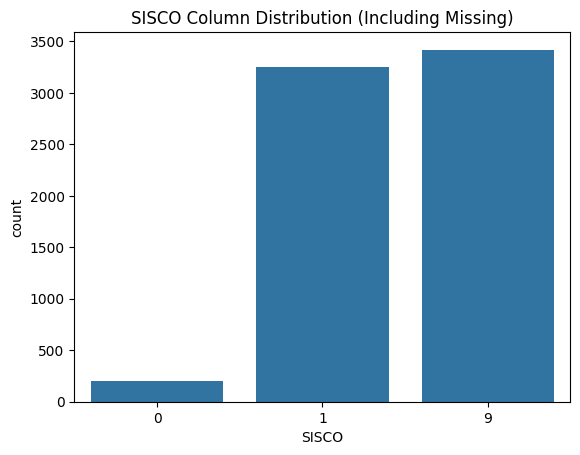

In [ ]:
# Analyze missing values in REPEAT
print(df.groupby('REPEAT').size())

# Analyze missing values in SISCO
print(df.groupby('SISCO').size())


sns.countplot(x='REPEAT', data=df)
plt.title("REPEAT Column Distribution (Including Missing)")
plt.show()

sns.countplot(x='SISCO', data=df)
plt.title("SISCO Column Distribution (Including Missing)")
plt.show()

**Feature Engineering**

*Grade Repetition Rate*

In [ ]:

grade_repetition_rate = df.groupby('STRATUM')['REPEAT'].apply(lambda x: (x.sum() / x.count()) * 100)


grade_repetition_rate = grade_repetition_rate.reset_index()
grade_repetition_rate.columns = ['STRATUM', 'Grade Repetition Rate']

print(grade_repetition_rate)

   STRATUM  Grade Repetition Rate
0    MAR01              48.464619
1    MAR02              48.087432
2    MAR03              62.412993
3    MAR04              53.353973
4    MAR05              63.838384
5    MAR06              51.174743
6    MAR07              61.851016
7    MAR08              77.575758
8    MAR09              49.582638
9    MAR10               4.819277
10   MAR11              49.397590
11   MAR12              50.602410


*Working for Pay*

In [ ]:
# Percentage of Students Working for Pay
workpay_rate = df.groupby('STRATUM')['WORKPAY'].apply(lambda x: (x > 0).sum() / x.count() * 100)

#  Average Weekly Work Frequency
avg_work_frequency = df.groupby('STRATUM')['WORKPAY'].mean()


regional_work_metrics = pd.DataFrame({
    'Work for Pay Rate (%)': workpay_rate,
    'Average Weekly Work Frequency': avg_work_frequency
}).reset_index()


print(regional_work_metrics)

   STRATUM  Work for Pay Rate (%)  Average Weekly Work Frequency
0    MAR01              32.443258                       1.817089
1    MAR02              40.437158                       2.221311
2    MAR03              33.062645                       1.941995
3    MAR04              29.618163                       1.714138
4    MAR05              33.333333                       1.935354
5    MAR06              32.745962                       1.933921
6    MAR07              31.376975                       1.821670
7    MAR08              43.030303                       2.381818
8    MAR09              32.554257                       1.953255
9    MAR10              19.277108                       1.204819
10   MAR11              40.963855                       2.638554
11   MAR12              24.096386                       1.349398


*Clear Idea About Future Job (SISCO)*

In [ ]:
# clear idea about future job
sisco_rate = df.groupby('STRATUM')['SISCO'].apply(lambda x: (x == 1).sum() / x.count() * 100)

sisco_rate = sisco_rate.reset_index()
sisco_rate.columns = ['STRATUM', 'Clear Idea About Future Job Rate']

print(sisco_rate)


   STRATUM  Clear Idea About Future Job Rate
0    MAR01                         51.668892
1    MAR02                         58.469945
2    MAR03                         53.828306
3    MAR04                         46.130031
4    MAR05                         27.878788
5    MAR06                         49.706314
6    MAR07                         33.634312
7    MAR08                         47.575758
8    MAR09                         52.253756
9    MAR10                         81.927711
10   MAR11                         51.807229
11   MAR12                         54.216867


*Index of Economic, Social, and Cultural Status (ESCS)*

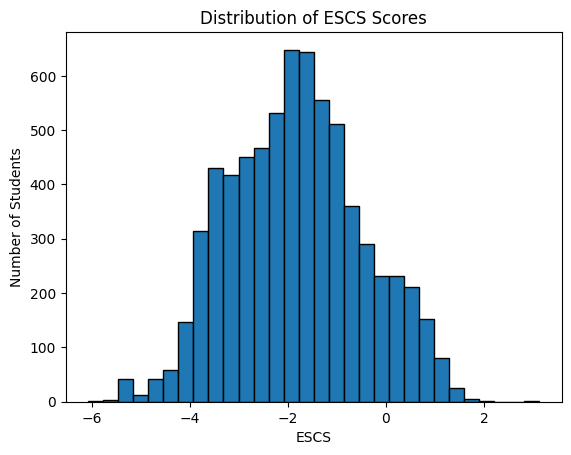

Mean ESCS: -1.8278555701179555
Median ESCS: -1.8381
Standard Deviation: 1.3502991303876162
Percentiles:
0.25   -2.8360
0.50   -1.8381
0.75   -0.9377
Name: ESCS, dtype: float64


In [ ]:

# histogram of ESCS values
plt.hist(df['ESCS'], bins=30, edgecolor='k')
plt.title('Distribution of ESCS Scores')
plt.xlabel('ESCS')
plt.ylabel('Number of Students')
plt.show()

# descriptive statistics
escs_mean = df['ESCS'].mean()
escs_median = df['ESCS'].median()
escs_std = df['ESCS'].std()
escs_percentiles = df['ESCS'].quantile([0.25, 0.5, 0.75])

print(f"Mean ESCS: {escs_mean}")
print(f"Median ESCS: {escs_median}")
print(f"Standard Deviation: {escs_std}")
print(f"Percentiles:\n{escs_percentiles}")


In [ ]:
# 25th percentile to determine the threshold
escs_25th_percentile = df['ESCS'].quantile(0.25)
print(f"25th Percentile ESCS: {escs_25th_percentile}")


25th Percentile ESCS: -2.836


In [ ]:
# D efining the threshold for low socio-economic status
threshold = escs_25th_percentile

# proportion of students with ESCS below the threshold
low_escs_proportion = df.groupby('STRATUM')['ESCS'].apply(lambda x: (x < threshold).sum() / len(x) * 100)


low_escs_proportion_df = low_escs_proportion.reset_index()
low_escs_proportion_df.columns = ['Region', 'Low Socio-Economic Proportion (%)']

print(low_escs_proportion_df)


   Region  Low Socio-Economic Proportion (%)
0   MAR01                          22.429907
1   MAR02                          26.502732
2   MAR03                          28.886311
3   MAR04                          21.052632
4   MAR05                          31.111111
5   MAR06                          17.694567
6   MAR07                          30.925508
7   MAR08                          29.696970
8   MAR09                          27.545910
9   MAR10                          31.325301
10  MAR11                          20.481928
11  MAR12                          27.710843


*ICT Resources (ICTSCH, ICTAVSCH, ICTQUAL, ICTENQ)*

In [ ]:

grouped_regions = df.groupby('STRATUM')

# Average ICT availability
avg_ict_availability = grouped_regions['ICTSCH'].mean()

print("Average ICT Availability:")
print(avg_ict_availability)

#  quantiles
low_threshold = avg_ict_availability.quantile(0.33)
high_threshold = avg_ict_availability.quantile(0.66)

# categorization
def categorize_ict_availability(value):
    if value <= low_threshold:
        return 'Low Availability'
    elif value <= high_threshold:
        return 'Moderate Availability'
    else:
        return 'Acceptable Availability'


avg_ict_availability = avg_ict_availability.reset_index()
avg_ict_availability.columns = ['STRATUM', 'Average ICT Availability']

# categorization of the Average ICT Availability column
avg_ict_availability['ICT Availability Category'] = avg_ict_availability['Average ICT Availability'].apply(categorize_ict_availability)

result = avg_ict_availability

print("Categorized ICT Availability:")
print(result)


Average ICT Availability:
STRATUM
MAR01   -0.066439
MAR02   -0.034437
MAR03   -0.033506
MAR04   -0.027652
MAR05   -0.092698
MAR06   -0.133235
MAR07   -0.092450
MAR08    0.082797
MAR09   -0.208240
MAR10   -0.059947
MAR11   -0.205580
MAR12   -0.059748
Name: ICTSCH, dtype: float64
Categorized ICT Availability:
   STRATUM  Average ICT Availability ICT Availability Category
0    MAR01                 -0.066439     Moderate Availability
1    MAR02                 -0.034437   Acceptable Availability
2    MAR03                 -0.033506   Acceptable Availability
3    MAR04                 -0.027652   Acceptable Availability
4    MAR05                 -0.092698          Low Availability
5    MAR06                 -0.133235          Low Availability
6    MAR07                 -0.092450     Moderate Availability
7    MAR08                  0.082797   Acceptable Availability
8    MAR09                 -0.208240          Low Availability
9    MAR10                 -0.059947     Moderate Availabilit

In [ ]:
# fully equipped schools
fully_equipped_schools = grouped_regions['ICTAVSCH'].apply(lambda x: (x == 7).sum() / len(x) * 100)

# ICT-enhanced learning proportion
ict_enhanced_learning = grouped_regions['ICTENQ'].apply(lambda x: (x > 0).sum() / len(x) * 100)


ict_metrics = pd.DataFrame({
    'Fully Equipped Schools (%)': fully_equipped_schools,
    'ICT-Enhanced Learning (%)': ict_enhanced_learning
})


print(ict_metrics)

         Fully Equipped Schools (%)  ICT-Enhanced Learning (%)
STRATUM                                                       
MAR01                     71.829105                  36.849132
MAR02                     62.568306                  39.071038
MAR03                     71.925754                  30.742459
MAR04                     73.787410                  25.902993
MAR05                     75.757576                  23.030303
MAR06                     67.400881                  33.920705
MAR07                     68.735892                  26.523702
MAR08                     74.545455                  32.121212
MAR09                     69.282137                  35.392321
MAR10                     71.084337                  36.144578
MAR11                     56.626506                  42.168675
MAR12                     77.108434                  21.686747


ICT Quality Distribution by Region (Percentage):
ICT_Quality_Tier  Low_ICT_Quality(%)  Medium_ICT_Quality(%)  \
STRATUM                                                       
MAR01                      26.301736              34.312417   
MAR02                      32.240437              28.688525   
MAR03                      32.018561              35.730858   
MAR04                      36.532508              31.888545   
MAR05                      34.343434              36.767677   
MAR06                      38.032305              30.323054   
MAR07                      37.923251              32.957111   
MAR08                      25.757576              38.787879   
MAR09                      27.378965              34.390651   
MAR10                      26.506024              39.759036   
MAR11                      30.120482              33.734940   
MAR12                      32.530120              30.120482   

ICT_Quality_Tier  High_ICT_Quality(%)  
STRATUM                     

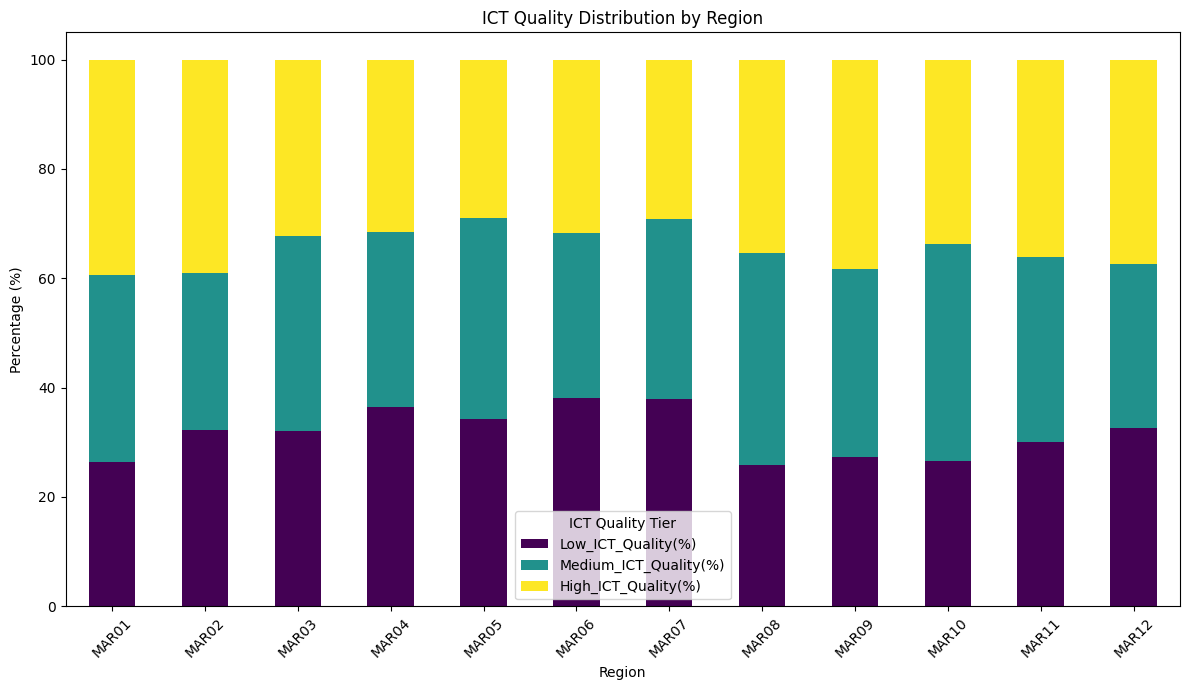

In [ ]:

# Defining thresholds based on quartiles
df['ICT_Quality_Tier'] = pd.qcut(df['ICTQUAL'], q=3, labels=['Low_ICT_Quality(%)', 'Medium_ICT_Quality(%)', 'High_ICT_Quality(%)'])

grouped_regions = df.groupby('STRATUM')['ICT_Quality_Tier'].value_counts(normalize=True) * 100


tier_distribution = grouped_regions.unstack()

tier_distribution = tier_distribution.fillna(0)

print("ICT Quality Distribution by Region (Percentage):")
print(tier_distribution)

tier_distribution.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('ICT Quality Distribution by Region')
plt.ylabel('Percentage (%)')
plt.xlabel('Region')
plt.legend(title='ICT Quality Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


         Mean Math Score  Mean Reading Score  Mean Science Score
STRATUM                                                         
MAR01         370.242506          350.472630          376.220080
MAR02         346.329390          304.641287          347.198665
MAR03         362.758955          343.440017          367.421542
MAR04         349.781619          309.394584          346.170239
MAR05         360.036499          337.893841          363.309672
MAR06         370.009287          339.896726          365.749856
MAR07         366.593043          347.956552          370.826609
MAR08         344.186169          325.173761          349.089788
MAR09         376.928093          358.223761          375.342564
MAR10         403.197664          413.831759          413.341133
MAR11         359.817696          329.140222          360.099111
MAR12         359.524584          344.320829          358.575841


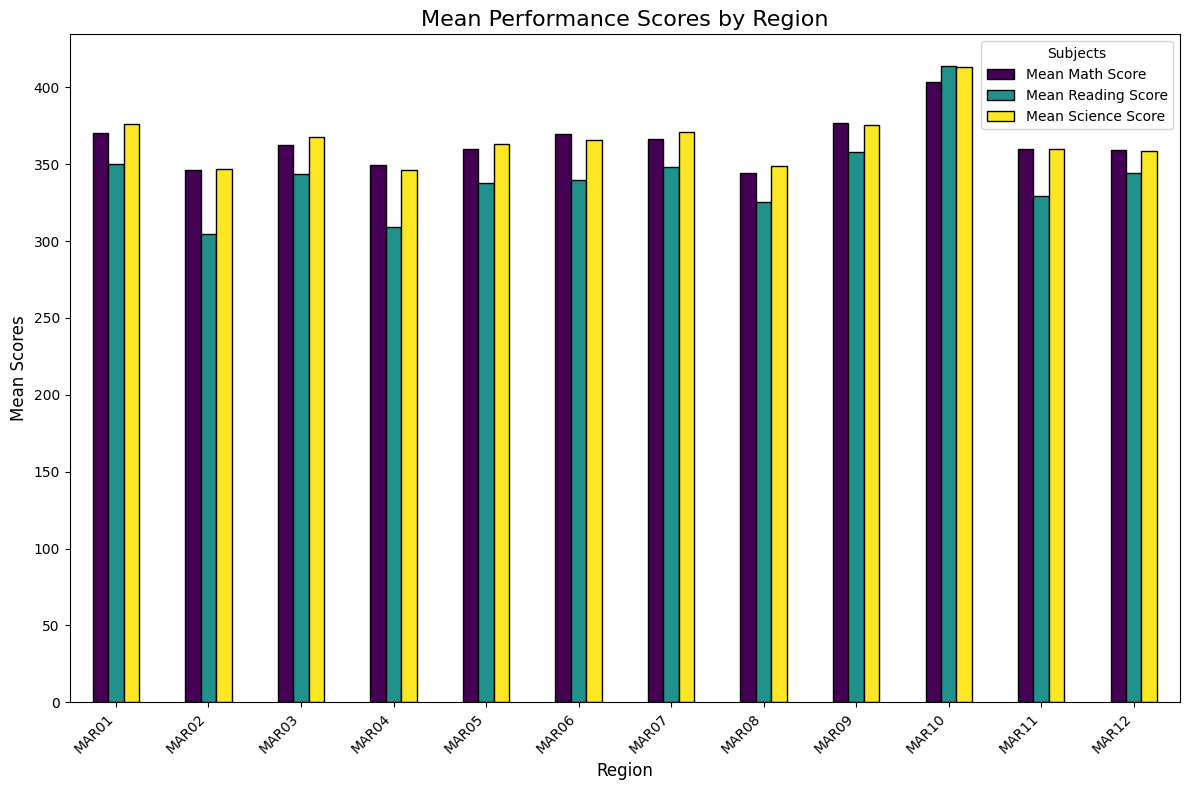

In [ ]:
# the mean of MATH, READING, and SCIENCE scores by region
mean_scores_by_region = df.groupby('STRATUM')[['MPVMATH', 'MPVREAD', 'MPVSCIE']].mean()

mean_scores_by_region.columns = ['Mean Math Score', 'Mean Reading Score', 'Mean Science Score']

print(mean_scores_by_region)

mean_scores_by_region.plot(
    kind='bar',
    figsize=(12, 8),
    colormap='viridis',
    edgecolor='black'
)

plt.title('Mean Performance Scores by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Mean Scores', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Subjects')
plt.tight_layout()
plt.show()


**Performance Variables (MPVMATH, MPVREAD, MPVSCIE) Clusters**

Data Preparation

In [ ]:


# Extract performance variables
performance_columns = ['MPVMATH', 'MPVREAD', 'MPVSCIE']
performance_data = df[performance_columns]

# Check for missing or invalid values
print("Number of missing values per column:")
print(performance_data.isnull().sum())

Number of missing values per column:
MPVMATH    0
MPVREAD    0
MPVSCIE    0
dtype: int64


Optimal Number of clusters

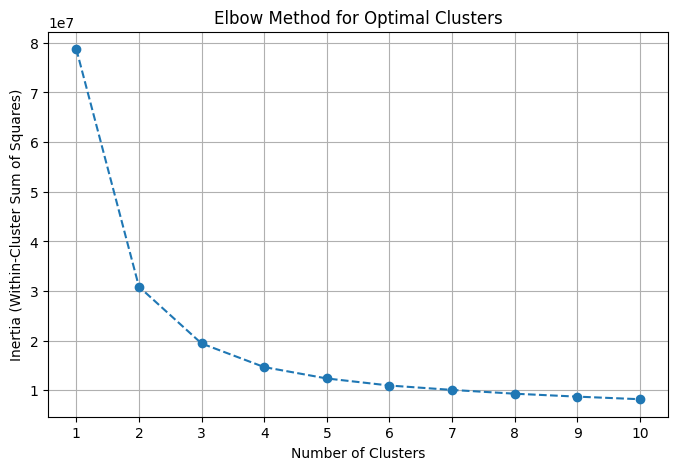

In [ ]:

# the range of clusters to evaluate
cluster_range = range(1, 11)  # Test from 1 to 10 clusters
inertia = []  # List to store inertia values

# inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(performance_data)
    inertia.append(kmeans.inertia_)

# the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Clusters')
plt.xticks(cluster_range)
plt.grid()
plt.show()


K-means

In [ ]:
# Apply KMeans clustering with the selected number of clusters
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Performance Cluster'] = kmeans.fit_predict(performance_data)

print("Clusters assigned to students:")
print(df[['MPVMATH', 'MPVREAD', 'MPVSCIE', 'Performance Cluster']].head())

Clusters assigned to students:
    MPVMATH   MPVREAD   MPVSCIE  Performance Cluster
0  360.7487  355.3656  338.8896                    0
1  461.7184  487.5750  488.9350                    1
2  414.4962  460.3951  423.1751                    1
3  340.1526  284.2741  347.6440                    0
4  396.9762  347.6067  398.9943                    3


Cluster Analysis

In [ ]:
# Calculate mean performance for each cluster
cluster_means = df.groupby('Performance Cluster')[['MPVMATH', 'MPVREAD', 'MPVSCIE']].mean()

print("\nMean performance scores for each cluster:")
print(cluster_means)


Mean performance scores for each cluster:
                        MPVMATH     MPVREAD     MPVSCIE
Performance Cluster                                    
0                    344.787038  319.156096  343.777961
1                    460.827306  446.829035  467.899674
2                    301.862274  258.472289  298.706622
3                    393.657048  378.922002  397.557689


In [ ]:
# min and max values for each cluster
cluster_stats = df.groupby('Performance Cluster')[['MPVMATH', 'MPVREAD', 'MPVSCIE']].agg(['min', 'max'])

print("Min and Max performance scores for each cluster:")
print(cluster_stats)


Min and Max performance scores for each cluster:
                      MPVMATH             MPVREAD             MPVSCIE  \
                          min       max       min       max       min   
Performance Cluster                                                     
0                    272.4990  434.4823  242.8183  406.4959  246.1814   
1                    374.2359  581.5202  334.6815  581.1992  379.4770   
2                    213.4147  384.6787  117.7943  340.2974  184.0134   
3                    327.9794  503.8677  279.6020  475.1308  319.3460   

                               
                          max  
Performance Cluster            
0                    434.2748  
1                    622.6263  
2                    398.9375  
3                    474.9990  


In [ ]:
#median values for each cluster
cluster_medians = df.groupby('Performance Cluster')[['MPVMATH', 'MPVREAD', 'MPVSCIE']].median()

print("Median performance scores for each cluster:")
print(cluster_medians)

#standard deviation and variance
cluster_stats = df.groupby('Performance Cluster')[['MPVMATH', 'MPVREAD', 'MPVSCIE']].agg(['std', 'var'])

print("Standard deviation and variance for each cluster:")
print(cluster_stats)


Median performance scores for each cluster:
                      MPVMATH    MPVREAD    MPVSCIE
Performance Cluster                                
0                    344.1873  318.54560  343.76940
1                    456.8116  443.83300  464.17350
2                    303.5509  262.35115  300.94835
3                    391.8061  377.85800  396.88570
Standard deviation and variance for each cluster:
                       MPVMATH                 MPVREAD               \
                           std          var        std          var   
Performance Cluster                                                   
0                    21.750506   473.084508  25.821282   666.738629   
1                    33.679426  1134.303724  36.384059  1323.799771   
2                    23.943991   573.314720  29.846753   890.828662   
3                    23.792485   566.082334  28.521740   813.489655   

                       MPVSCIE               
                           std          var  
Perf

In [ ]:
#proportions of students in each cluster
cluster_proportions = df['Performance Cluster'].value_counts(normalize=True) * 100

print("Proportion of students in each cluster (%):")
print(cluster_proportions)


Proportion of students in each cluster (%):
Performance Cluster
0    33.187709
3    28.352993
2    25.105577
1    13.353721
Name: proportion, dtype: float64


In [ ]:
df_with_region = df[['STRATUM', 'MPVMATH', 'MPVREAD', 'MPVSCIE']]
df_with_region['Performance Cluster'] = kmeans.fit_predict(performance_data)
print(df_with_region.head())

  STRATUM   MPVMATH   MPVREAD   MPVSCIE  Performance Cluster
0   MAR01  360.7487  355.3656  338.8896                    0
1   MAR01  461.7184  487.5750  488.9350                    1
2   MAR01  414.4962  460.3951  423.1751                    1
3   MAR01  340.1526  284.2741  347.6440                    0
4   MAR01  396.9762  347.6067  398.9943                    3


<ipython-input-97-0518a974c5dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_region['Performance Cluster'] = kmeans.fit_predict(performance_data)


Performance Cluster  Low Performance(%)  High Performance(%)  \
STRATUM                                                        
MAR01                         32.843792            15.754339   
MAR02                         34.426230             3.825137   
MAR03                         37.703016            14.617169   
MAR04                         28.173375            11.455108   
MAR05                         38.787879             8.484848   
MAR06                         33.847283            13.950073   
MAR07                         30.699774            16.139955   
MAR08                         39.696970             6.363636   
MAR09                         31.385643            17.028381   
MAR10                         12.048193            39.759036   
MAR11                         31.325301            13.253012   
MAR12                         34.939759             7.228916   

Performance Cluster  Very Low Performance(%)  Moderate Performance(%)  
STRATUM                        

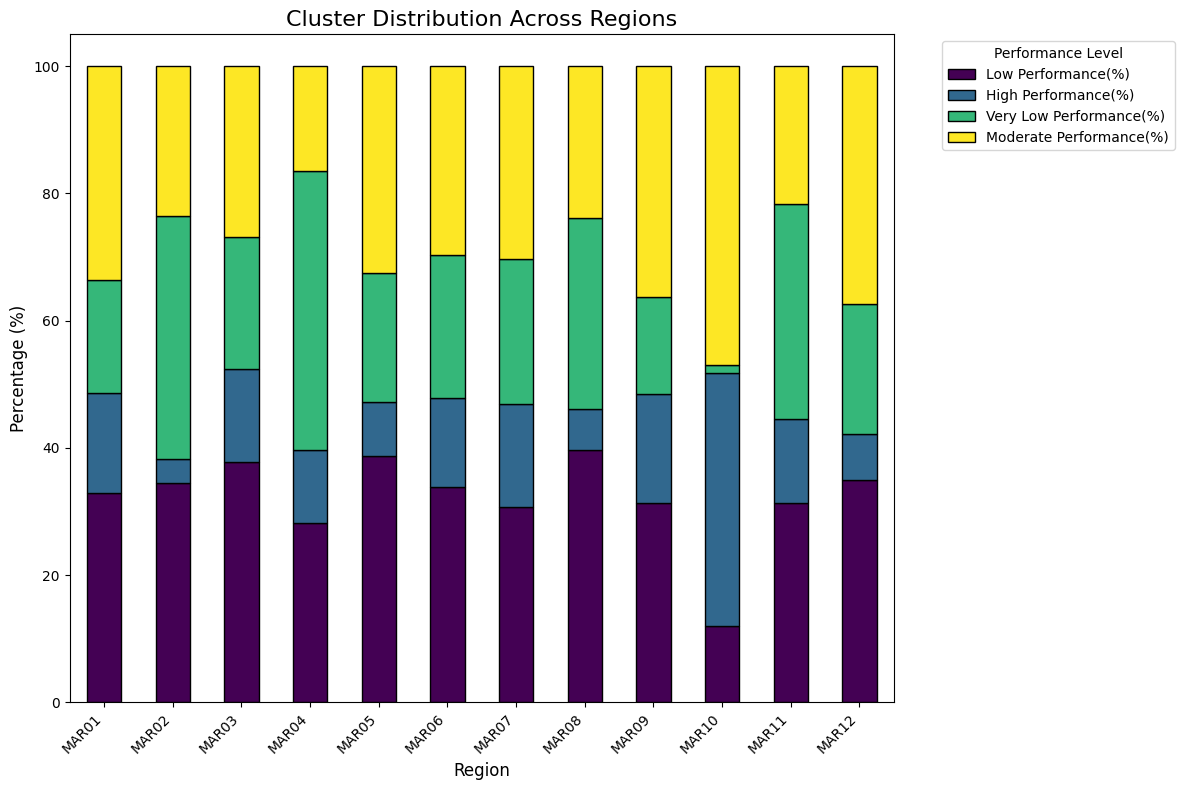

In [ ]:

# dictionary to label clusters
cluster_labels = {
    0: 'Low Performance(%)',
    1: 'High Performance(%)',
    2: 'Very Low Performance(%)',
    3: 'Moderate Performance(%)'
}

cluster_distribution = df_with_region.groupby(['STRATUM', 'Performance Cluster']).size().unstack(fill_value=0)

# Calculate the proportion of each cluster within each region
cluster_distribution_percentage = cluster_distribution.div(cluster_distribution.sum(axis=1), axis=0) * 100

cluster_distribution_percentage.rename(columns=cluster_labels, inplace=True)
print(cluster_distribution_percentage)

ax = cluster_distribution_percentage.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='viridis',
    edgecolor='black'
)

plt.title('Cluster Distribution Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Performance Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Visualization

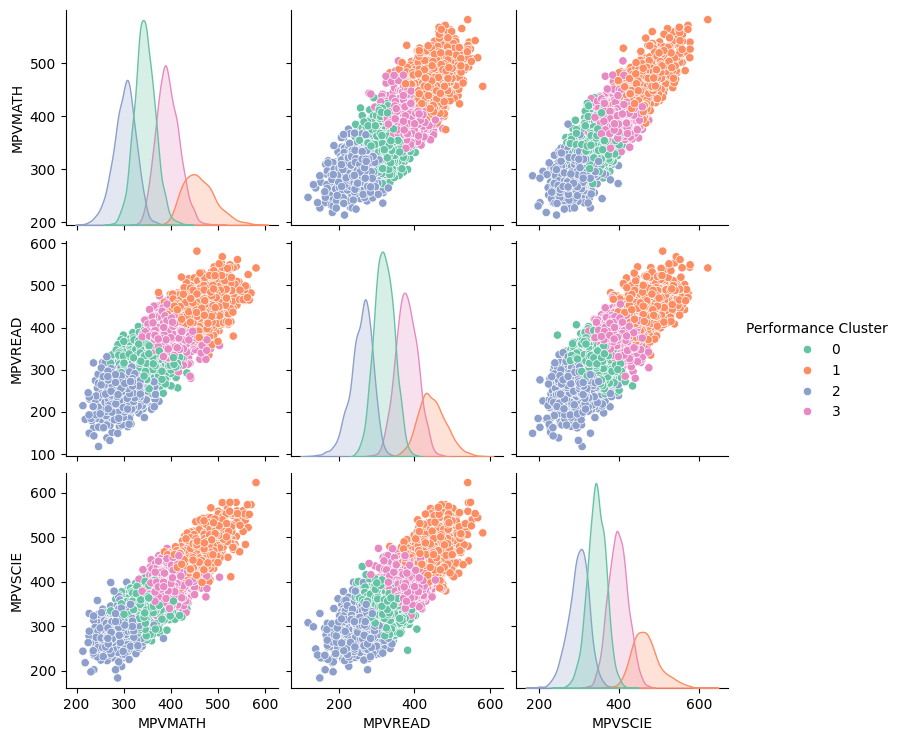

In [ ]:
sns.pairplot(df, hue='Performance Cluster', vars=['MPVMATH', 'MPVREAD', 'MPVSCIE'], palette='Set2')
plt.show()

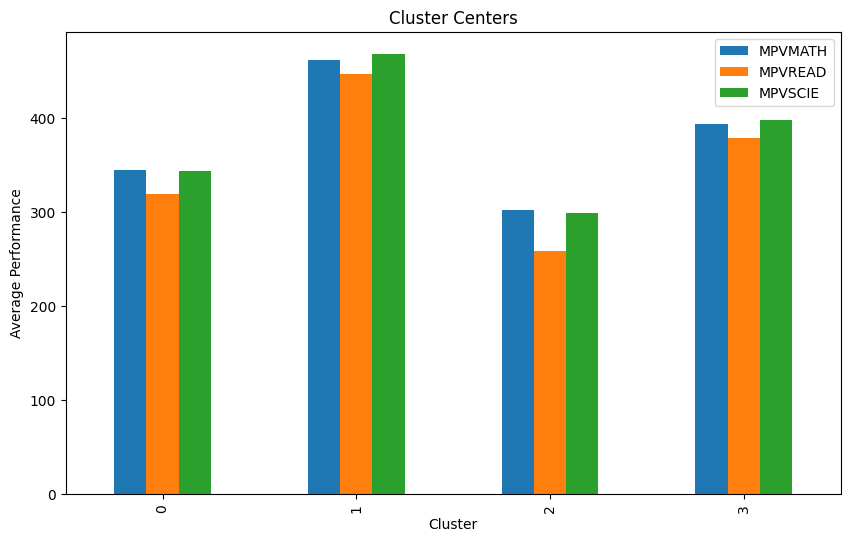

In [ ]:
# cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['MPVMATH', 'MPVREAD', 'MPVSCIE'])
cluster_centers.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Centers")
plt.xlabel("Cluster")
plt.ylabel("Average Performance")
plt.legend(loc="best")
plt.show()


**Combine All Features into One DataFrame**

In [ ]:
print(grade_repetition_rate)
print(regional_work_metrics)
print(sisco_rate)
print(low_escs_proportion_df)
print(result)
print(tier_distribution)
print(mean_scores_by_region)

   STRATUM  Grade Repetition Rate
0    MAR01              48.464619
1    MAR02              48.087432
2    MAR03              62.412993
3    MAR04              53.353973
4    MAR05              63.838384
5    MAR06              51.174743
6    MAR07              61.851016
7    MAR08              77.575758
8    MAR09              49.582638
9    MAR10               4.819277
10   MAR11              49.397590
11   MAR12              50.602410
   STRATUM  Work for Pay Rate (%)  Average Weekly Work Frequency
0    MAR01              32.443258                       1.817089
1    MAR02              40.437158                       2.221311
2    MAR03              33.062645                       1.941995
3    MAR04              29.618163                       1.714138
4    MAR05              33.333333                       1.935354
5    MAR06              32.745962                       1.933921
6    MAR07              31.376975                       1.821670
7    MAR08              43.030303     

In [ ]:
# Ensuring all DataFrames have a consistent key column 'STRATUM'
low_escs_proportion_df.rename(columns={'Region': 'STRATUM'}, inplace=True)

# Merging all DataFrames on 'STRATUM'
resulting_df = (
    grade_repetition_rate
    .merge(regional_work_metrics, on='STRATUM', how='left')
    .merge(sisco_rate, on='STRATUM', how='left')
    .merge(low_escs_proportion_df, on='STRATUM', how='left')
    .merge(result, on='STRATUM', how='left')
    .merge(tier_distribution, on='STRATUM', how='left')
    .merge(mean_scores_by_region, on='STRATUM', how='left')
    .merge(ict_metrics, on='STRATUM', how='left')
    .merge(cluster_distribution_percentage, on='STRATUM', how='left')
)

print("Unified Regional Analysis DataFrame:")
print(resulting_df)



Unified Regional Analysis DataFrame:
   STRATUM  Grade Repetition Rate  Work for Pay Rate (%)  \
0    MAR01              48.464619              32.443258   
1    MAR02              48.087432              40.437158   
2    MAR03              62.412993              33.062645   
3    MAR04              53.353973              29.618163   
4    MAR05              63.838384              33.333333   
5    MAR06              51.174743              32.745962   
6    MAR07              61.851016              31.376975   
7    MAR08              77.575758              43.030303   
8    MAR09              49.582638              32.554257   
9    MAR10               4.819277              19.277108   
10   MAR11              49.397590              40.963855   
11   MAR12              50.602410              24.096386   

    Average Weekly Work Frequency  Clear Idea About Future Job Rate  \
0                        1.817089                         51.668892   
1                        2.221311       

In [ ]:

# the mapping file
region_mapping = pd.read_csv('/content/Updated_Moroccan_Region_Mapping.csv')

# Mapping the 'STRATUM' column to the comprehensive region names
resulting_df['Region'] = resulting_df['STRATUM'].map(region_mapping.set_index('STRATUM')['region'])

resulting_df.drop(columns=['STRATUM'], inplace=True)

print(resulting_df.head())


   Grade Repetition Rate  Work for Pay Rate (%)  \
0              48.464619              32.443258   
1              48.087432              40.437158   
2              62.412993              33.062645   
3              53.353973              29.618163   
4              63.838384              33.333333   

   Average Weekly Work Frequency  Clear Idea About Future Job Rate  \
0                       1.817089                         51.668892   
1                       2.221311                         58.469945   
2                       1.941995                         53.828306   
3                       1.714138                         46.130031   
4                       1.935354                         27.878788   

   Low Socio-Economic Proportion (%)  Average ICT Availability  \
0                          22.429907                 -0.066439   
1                          26.502732                 -0.034437   
2                          28.886311                 -0.033506   
3       

In [ ]:
# Moving'Region' column to the first position
columns = ['Region'] + [col for col in resulting_df if col != 'Region']
resulting_df = resulting_df[columns]
print(resulting_df.head())

                   Region  Grade Repetition Rate  Work for Pay Rate (%)  \
0  Tanger-Tetouan-Hoceima              48.464619              32.443258   
1                Oriental              48.087432              40.437158   
2              Fes-Meknes              62.412993              33.062645   
3      Rabat-Salé-Kénitra              53.353973              29.618163   
4    Beni Mellal-Khenifra              63.838384              33.333333   

   Average Weekly Work Frequency  Clear Idea About Future Job Rate  \
0                       1.817089                         51.668892   
1                       2.221311                         58.469945   
2                       1.941995                         53.828306   
3                       1.714138                         46.130031   
4                       1.935354                         27.878788   

   Low Socio-Economic Proportion (%)  Average ICT Availability  \
0                          22.429907                 -0.066439

In [ ]:
#Saving the resulting DataFrame to a CSV file for the next steps of the project
resulting_df.to_csv('Unified_Regional_Analysis.csv', index=False)